# Test Training Space

Does the training space resemble the data to be analyzed... at all?

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import model

plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

plt.rcParams['figure.dpi'] = 300

In [26]:
rand_points = np.load('datfiles/rand_points.npy')
rand_samples = np.load('datfiles/rand_samples.npy')

post_chain = np.load('datfiles/posterior_chain.npy')
post_samples = np.load('datfiles/posterior_samples.npy')

theta = np.load('datfiles/theta_star.npy')

In [27]:
rand_points.shape, post_chain.shape

((1000, 32), (1000, 32))

In [28]:
n1 = model.branching_ratio.size
n2 = model.num_pts_total_capture
n3 = model.num_pts_total_scatter

# n1 = model.nbr
# n2 = model.ncapture
# n3 = model.nscatter

stop = np.cumsum([n1, n2, n3])
start = stop - np.array([n1, n2, n3])

In [29]:
mu = model.calculate(theta)

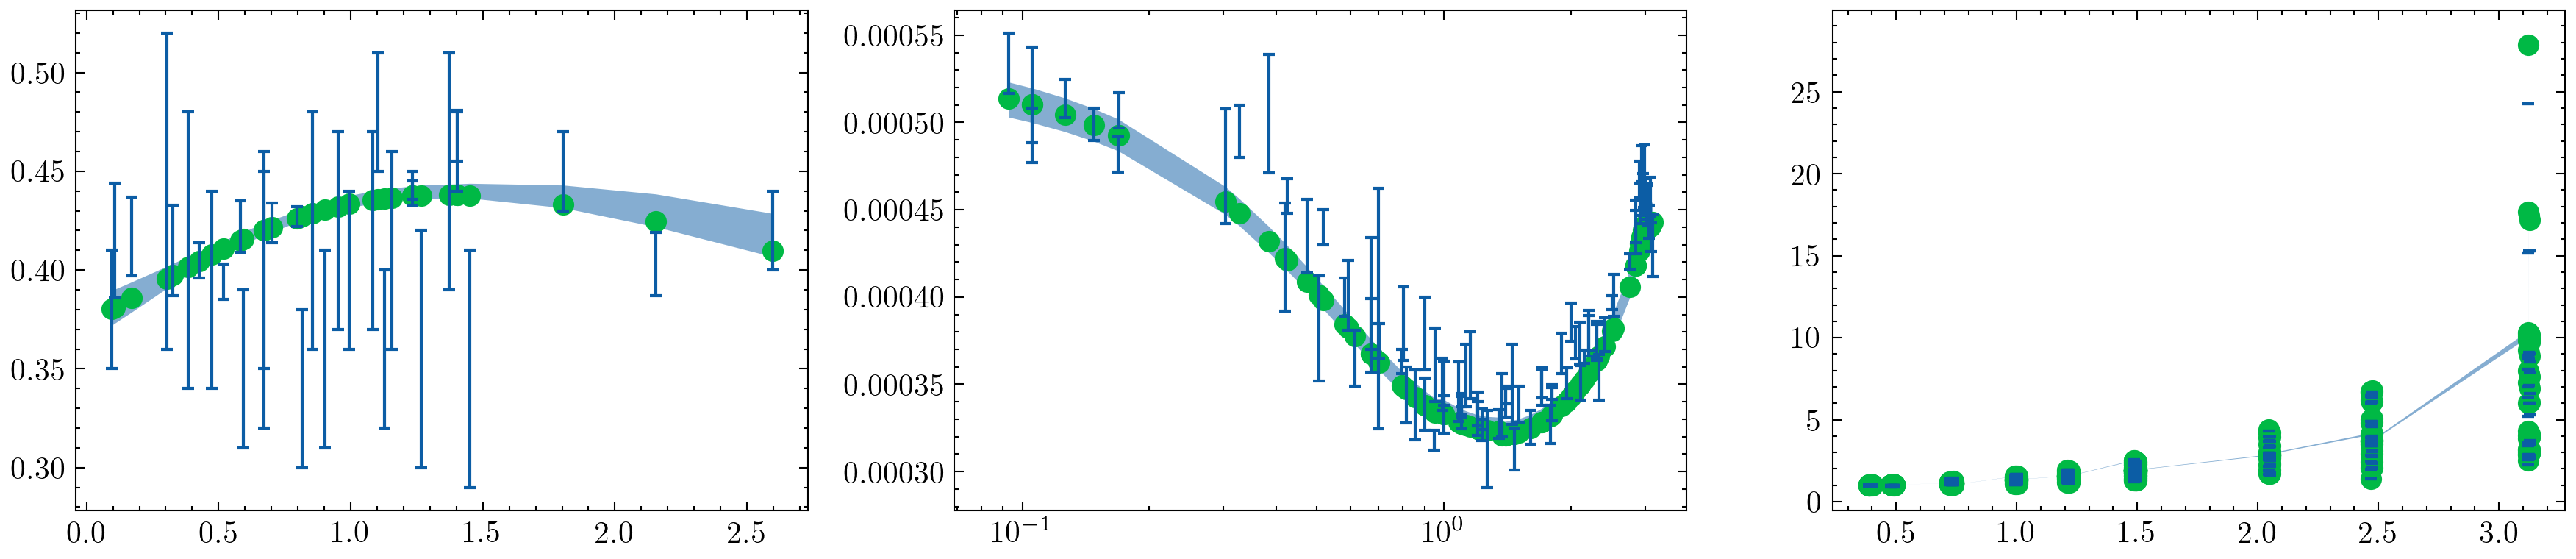

In [30]:
low, med, high = np.quantile(post_samples, [0.16, 0.5, 0.84], axis=0)

fig, ax = plt.subplots(ncols=3, figsize=(3*gr*h, h))
fig.patch.set_facecolor('white')

for (i, (j, k)) in enumerate(zip(start, stop)):
    ax[i].errorbar(model.x[j:k], model.y[j:k], yerr=model.dy[j:k], linestyle='', capsize=2)
    
    xp = model.x[j:k]
    mup = mu[j:k]
    ie = np.argsort(xp)
    lowp = low[j:k]
    highp = high[j:k]
    ax[i].fill_between(xp[ie], lowp[ie], highp[ie], alpha=0.5)
#     ax[i].scatter(model.x[j:k], med[j:k], color='C1')
    ax[i].scatter(xp[ie], mup[ie], color='C1')
ax[1].set_xscale('log');
# ax[1].set_ylim([25e-5, 60e-5]);

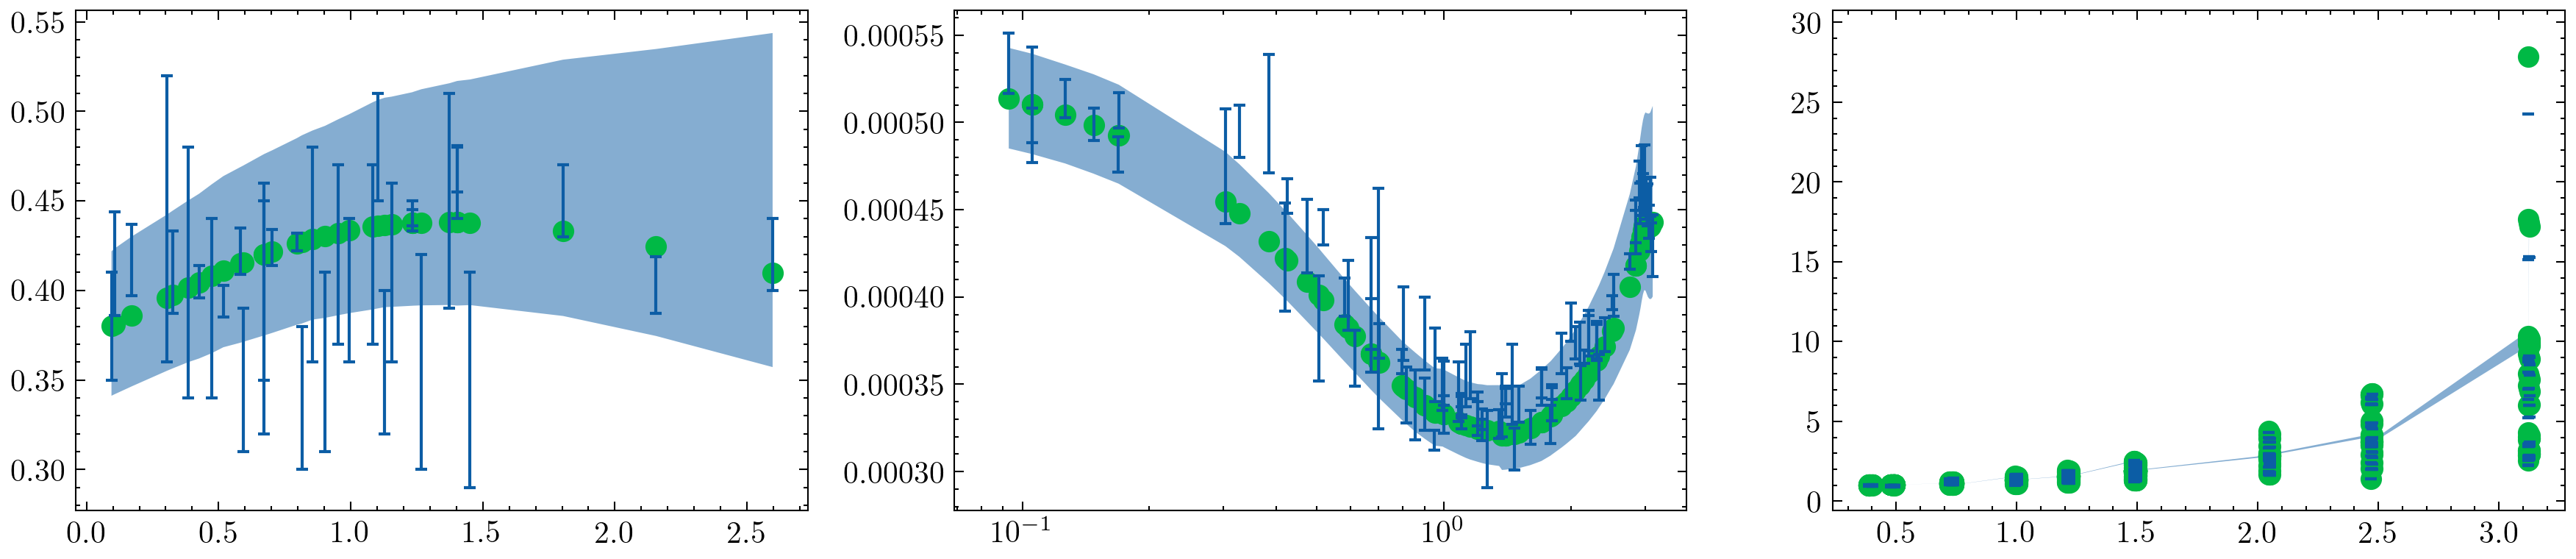

In [24]:
low, med, high = np.quantile(rand_samples, [0.16, 0.5, 0.84], axis=0)

fig, ax = plt.subplots(ncols=3, figsize=(3*gr*h, h))
fig.patch.set_facecolor('white')

for (i, (j, k)) in enumerate(zip(start, stop)):
    ax[i].errorbar(model.x[j:k], model.y[j:k], yerr=model.dy[j:k], linestyle='', capsize=2)
    
    xp = model.x[j:k]
    mup = mu[j:k]
    ie = np.argsort(xp)
    lowp = low[j:k]
    highp = high[j:k]
    ax[i].fill_between(xp[ie], lowp[ie], highp[ie], alpha=0.5)
#     ax[i].scatter(model.x[j:k], med[j:k], color='C1')
    ax[i].scatter(xp[ie], mup[ie], color='C1')
# ax[0].set_ylim([0.2, 0.6])
ax[1].set_xscale('log');
# ax[1].set_ylim([25e-5, 60e-5]);